# COMP377: AI for Software Developers
## Assignment 3: Multi-layer Neural Network
### Exercise 2

Name: Wenjie Zhou

Student ID: 301337168

Date: November 5, 2024

File Name: WenjieZhou_COMP377Lab3_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random
import struct

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Functions to load MNIST dataset files
def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(-1, 28 * 28)
        return images

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Define file paths for the dataset files
training_images_filepath = './MNIST/train-images-idx3-ubyte'
training_labels_filepath = './MNIST/train-labels-idx1-ubyte'
test_images_filepath = './MNIST/t10k-images-idx3-ubyte'
test_labels_filepath = './MNIST/t10k-labels-idx1-ubyte'

# Load the dataset files
X_train = load_mnist_images(training_images_filepath)
y_train = load_mnist_labels(training_labels_filepath)
X_test = load_mnist_images(test_images_filepath)
y_test = load_mnist_labels(test_labels_filepath)

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Define MLP Model with 2 hidden layers and 2 dropout layers
# Select the relu activation function for hidden layers and softmax for output layer
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the Model with the input shape
mlp_model = create_mlp_model(X_train_scaled.shape[1])

# Define EarlyStopping callback with patience of 5
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

# Train the model and capture the training history with early stopping
# Select batch size of 64 and 20 epochs
history = mlp_model.fit(X_train_scaled, y_train_categorical,
                        epochs=20,
                        batch_size=64,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)

Epoch 1/20


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8005 - loss: 0.6618 - val_accuracy: 0.9495 - val_loss: 0.1672
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9291 - loss: 0.2319 - val_accuracy: 0.9601 - val_loss: 0.1328
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9449 - loss: 0.1841 - val_accuracy: 0.9624 - val_loss: 0.1289
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9527 - loss: 0.1544 - val_accuracy: 0.9654 - val_loss: 0.1232
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9598 - loss: 0.1310 - val_accuracy: 0.9675 - val_loss: 0.1173
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9642 - loss: 0.1175 - val_accuracy: 0.9682 - val_loss: 0.1177
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9656 - loss: 0.1063 - val_accuracy: 0.9701 - val_loss: 0.1148
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9689 - loss: 0.1008 - val_accuracy: 0.9698 - val_

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions on the test set
y_pred = np.argmax(mlp_model.predict(X_test_scaled), axis=1)
y_pred_proba = mlp_model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_categorical, y_pred_proba, multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
ROC AUC: 1.00


### Visualization and Display (Optional)

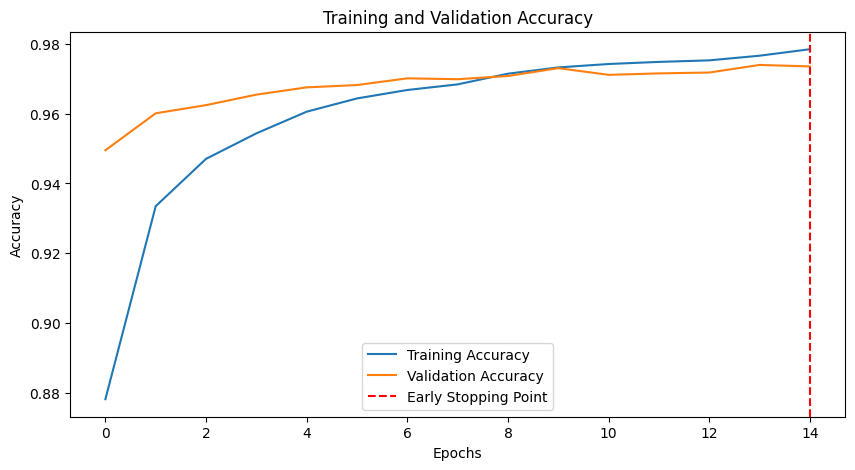

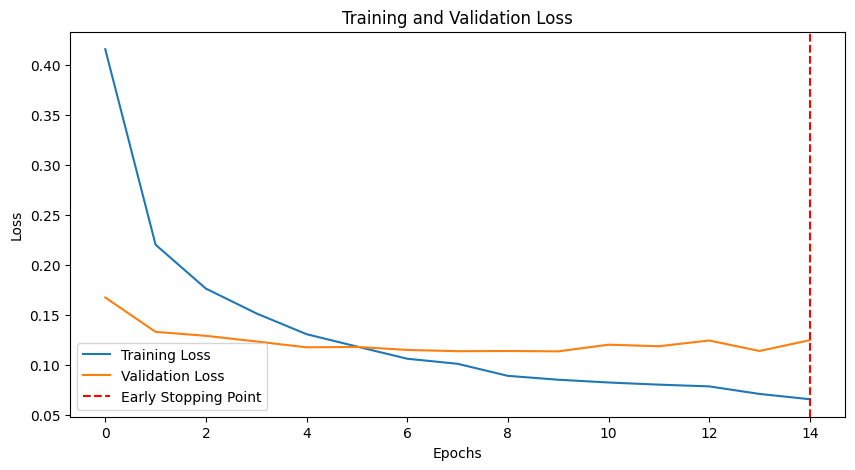

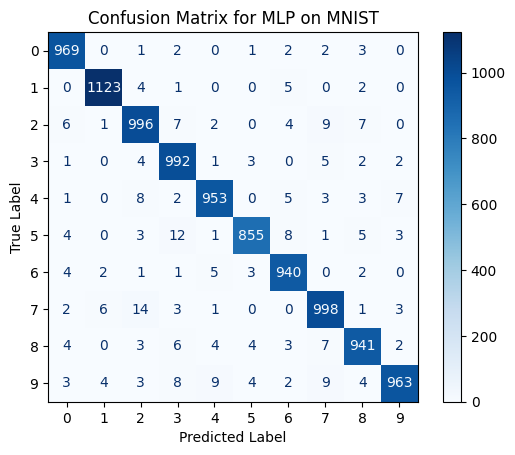

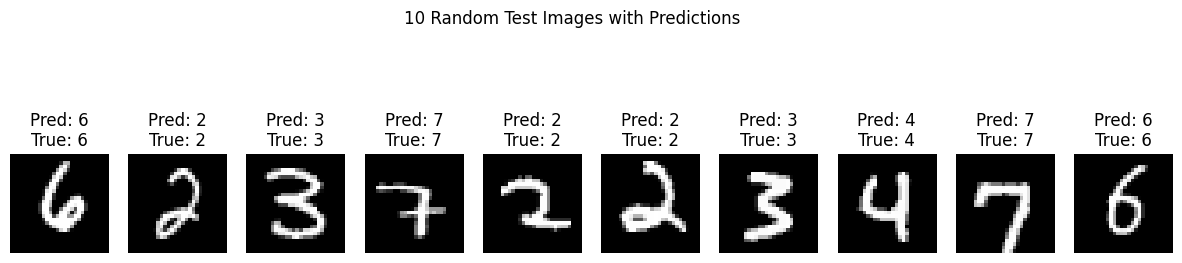

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###

# Learning Curves
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axvline(x=early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.legend()
plt.show()
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axvline(x=early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.legend()
plt.show()

# Confusion Matrix
# Display performance of the model in terms of true positives, false positives, true negatives, and false negatives.
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for MLP on MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Sample Predictions
# Display 10 random test images with their true and predicted labels
num_samples = 10
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
plt.figure(figsize=(15, 4))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test[idx]}")
plt.suptitle('10 Random Test Images with Predictions')
plt.show()

### Summary and Conclusions

MLP
- Accuracy: 0.97
- Precision: 0.97
- Recall: 0.97
- F1 Score: 0.97
- ROC AUC: 1.00

The MLP model's performance on the MNIST dataset is outstanding, with an accuracy, precision, recall, and F1 score of 0.97. This indicates that the model is performing very well in classifying digits, with balanced performance across positive and negative classes. The ROC AUC score of 1.00 further demonstrates that the model is able to perfectly distinguish between the different classes. Overall, the model shows excellent results in terms of both accuracy and reliability, suggesting a high-quality model for digit recognition.

Although the model's performance is excellent, there are signs of potential overfitting, given the high ROC AUC and near-perfect evaluation metrics. To improve the model's generalization ability, it would be beneficial to explore techniques such as data augmentation, increasing dropout rates, or implementing early stopping. Additionally, experimenting with smaller batch sizes, fine-tuning the learning rate, or applying regularization methods (like L2 regularization) could help prevent overfitting. Exploring more advanced architectures, such as deeper networks or convolutional neural networks (CNNs), could also enhance performance for image classification tasks like MNIST.

#### Comparison

SVM
- Accuracy: 0.93
- Precision: 0.93
- Recall: 0.93

Logistic
- Accuracy: 0.92
- Precision: 0.92
- Recall: 0.92

The MLP model outperforms both the Support Vector Machine and Logistic Regression models with an accuracy, precision, recall, and F1 score of 0.97, compared to 0.93 and 0.92, respectively, for SVM and Logistic Regression. Additionally, the MLP achieves a perfect ROC AUC score of 1.00, further highlighting its superior performance in classifying the MNIST dataset. While SVM and Logistic Regression models provide solid results, the MLP’s ability to capture more complex patterns leads to better overall classification performance, making it the more effective model for this task. However, for scenarios requiring faster predictions or less computational overhead, the SVM and Logistic models might still be useful alternatives.